In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 50

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset_turkiye-student-evaluation_generic.csv")
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#patterns
no_of_patterns=len(df)
print(no_of_patterns)
#features
print(len(df.columns))

5820
33


In [ ]:
# statistical description of dataset
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:

# check for null values
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

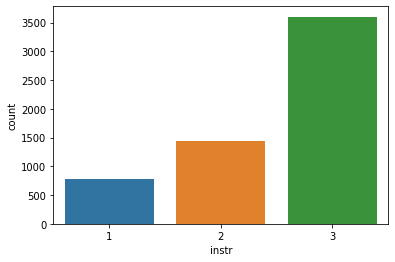

In [ ]:
sns.countplot(df['instr'])

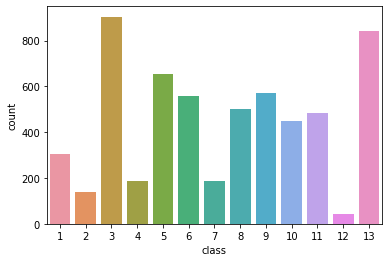

In [ ]:
sns.countplot(df['class'])

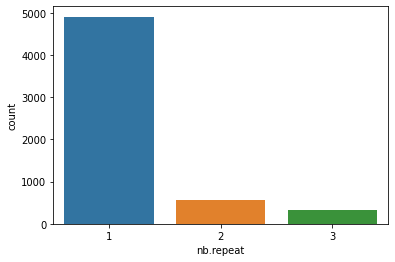

In [ ]:
sns.countplot(df['nb.repeat'])

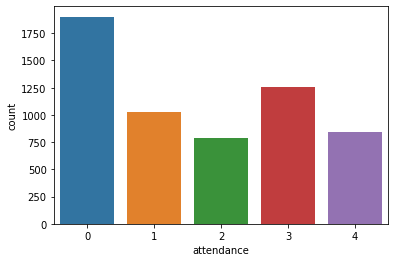

In [ ]:
sns.countplot(df['attendance'])

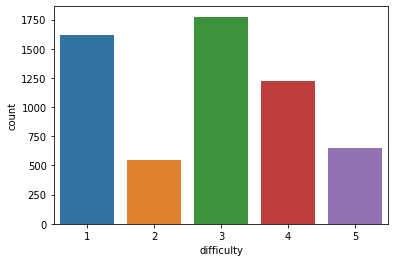

In [ ]:
sns.countplot(df['difficulty'])

In [ ]:

# find mean of questions
x_questions = df.iloc[:, 5:33]
q_mean = x_questions.mean(axis=0)
total_mean = q_mean.mean()

In [ ]:
q_mean = q_mean.to_frame('mean')
q_mean.reset_index(level=0, inplace=True)
q_mean.head()

,index,mean
0,Q1,2.929897
1,Q2,3.073883
2,Q3,3.178694
3,Q4,3.082474
4,Q5,3.105842


In [ ]:

total_mean

3.1861561119293085

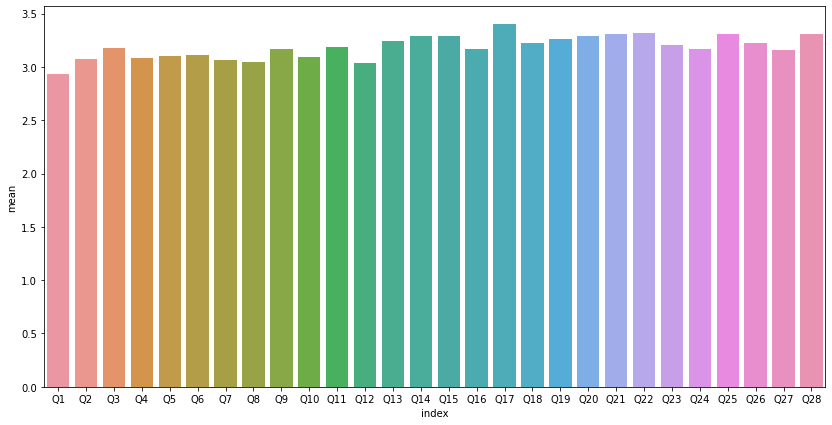

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(x='index', y='mean', data=q_mean)

In [ ]:
ques_mean = {'Q1':'mean', 'Q2':'mean', 'Q3':'mean', 'Q4':'mean', 'Q5':'mean', 'Q6':'mean', 'Q7':'mean', 'Q8':'mean',
     'Q9':'mean', 'Q10':'mean', 'Q11':'mean', 'Q12':'mean', 'Q13':'mean', 'Q14':'mean', 'Q15':'mean', 'Q16':'mean',
     'Q17':'mean', 'Q18':'mean', 'Q19':'mean', 'Q19':'mean', 'Q20':'mean', 'Q21':'mean', 'Q22':'mean', 'Q23':'mean',
     'Q24':'mean', 'Q25':'mean', 'Q26':'mean', 'Q27':'mean', 'Q28':'mean'}

In [ ]:
ques = df.groupby('class').agg(ques_mean)

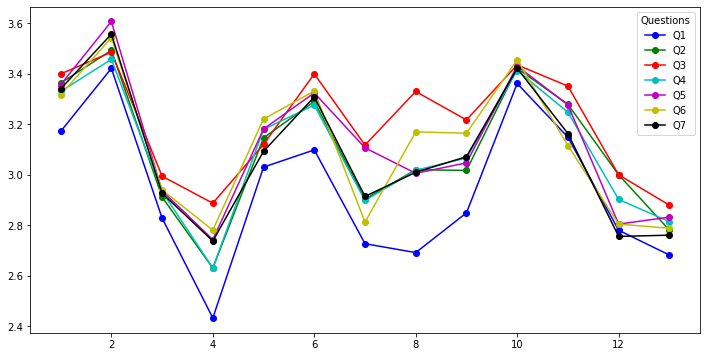

In [ ]:

plt.figure(figsize = (12,6))
plt.plot(ques.index, ques.Q1, marker='o', color='b', label='Q1')
plt.plot(ques.index, ques.Q2, marker='o', color='g', label='Q2')
plt.plot(ques.index, ques.Q3, marker='o', color='r', label='Q3')
plt.plot(ques.index, ques.Q4, marker='o', color='c', label='Q4')
plt.plot(ques.index, ques.Q5, marker='o', color='m', label='Q5')
plt.plot(ques.index, ques.Q6, marker='o', color='y', label='Q6')
plt.plot(ques.index, ques.Q7, marker='o', color='k', label='Q7')
plt.legend(title='Questions')
plt.show()

In [ ]:
#From the abov graph, we can see that students enrolled in course 2, 3, 5,10 have very similar opinions.

#As they have given ratings, similar ratings for the questions from 1 to 7.

#We see that, these questions are about the courses content and how the course was covered.

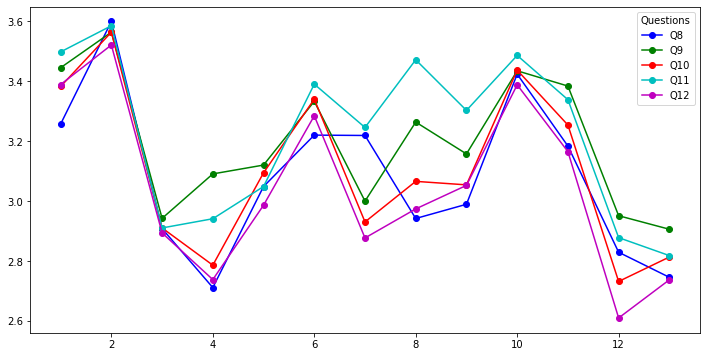

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(ques.index, ques.Q8, marker='o', color='b', label='Q8')
plt.plot(ques.index, ques.Q9, marker='o', color='g', label='Q9')
plt.plot(ques.index, ques.Q10, marker='o', color='r', label='Q10')
plt.plot(ques.index, ques.Q11, marker='o', color='c', label='Q11')
plt.plot(ques.index, ques.Q12, marker='o', color='m', label='Q12')
plt.legend(title='Questions')
plt.show()

In [ ]:
#The trend continues for course 2, 3 & 10, but we can see variations in course 5. for questions 8 to 12.

#We see that, these questions are about how the courses helped them to gain skills & how relevent the course is, how much they enjoyed during studying it.

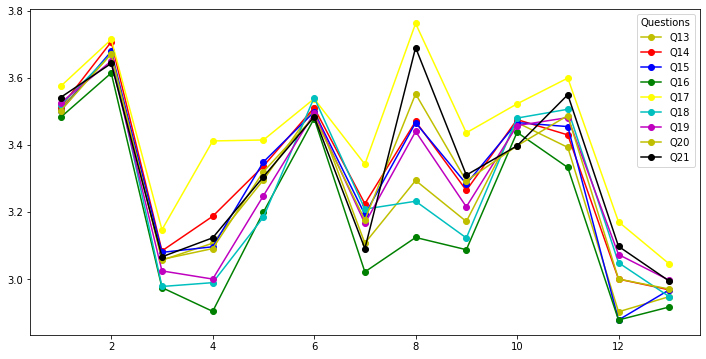

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(ques.index, ques.Q13, marker='o', color='y', label='Q13')
plt.plot(ques.index, ques.Q14, marker='o', color='r', label='Q14')
plt.plot(ques.index, ques.Q15, marker='o', color='b', label='Q15')
plt.plot(ques.index, ques.Q16, marker='o', color='g', label='Q16')
plt.plot(ques.index, ques.Q17, marker='o', color='yellow', label='Q17')
plt.plot(ques.index, ques.Q18, marker='o', color='c', label='Q18')
plt.plot(ques.index, ques.Q19, marker='o', color='m', label='Q19')
plt.plot(ques.index, ques.Q20, marker='o', color='y', label='Q20')
plt.plot(ques.index, ques.Q21, marker='o', color='k', label='Q21')
plt.legend(title='Questions')
plt.show()

In [ ]:
#Here we see that, course 2,6 & 10 have similar ratings, for questions 13 to 21.

#These questions are about instructor's knowledge, how well he explained, and how easily students could grap

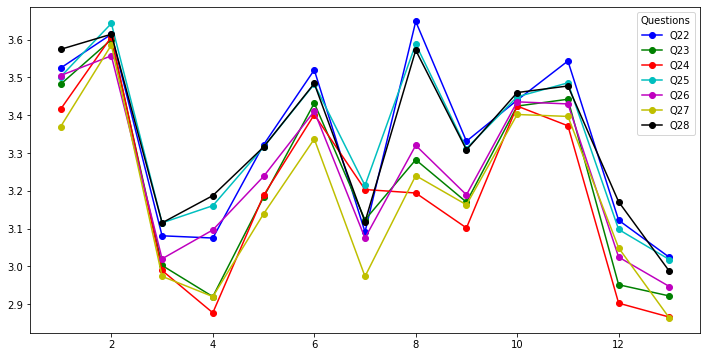

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(ques.index, ques.Q22, marker='o', color='b', label='Q22')
plt.plot(ques.index, ques.Q23, marker='o', color='g', label='Q23')
plt.plot(ques.index, ques.Q24, marker='o', color='r', label='Q24')
plt.plot(ques.index, ques.Q25, marker='o', color='c', label='Q25')
plt.plot(ques.index, ques.Q26, marker='o', color='m', label='Q26')
plt.plot(ques.index, ques.Q27, marker='o', color='y', label='Q27')
plt.plot(ques.index, ques.Q28, marker='o', color='k', label='Q28')
plt.legend(title='Questions')
plt.show()

In [ ]:
# Dropping the column
df1=df.drop(['instr','class','nb.repeat','attendance','difficulty'],1)
df1.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Scaling the Data
# The formula for calculating a z-score is is z = (x-μ)/σ,
# where x is the raw score, μ is the population mean, and σ is the population standard deviation.
from scipy.stats import zscore
df_scaled =df1.apply(zscore)
df_scaled.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [ ]:
# Reduces high dimension to low dimension
# It co-relates the features that  are similar and clubs them into 2d plot by maintaing the quality
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled)

In [ ]:
#K MEANS INBUILT XPCA
# Applying K-Means

from sklearn.cluster import KMeans

cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 10)
    #clusters.fit(df_scaled)
    clusters.fit(X_pca)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,141390.035033
1,2,54784.377134
2,3,23705.143754
3,4,15359.195820
4,5,10364.959426
5,6,7665.210766
6,7,6314.613095
7,8,5434.915055
8,9,4822.750730


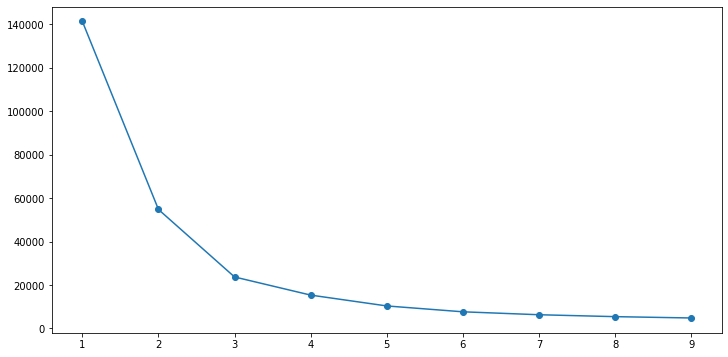

In [ ]:
# ELbow Plot
plt.figure(figsize = (12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o')
plt.show()

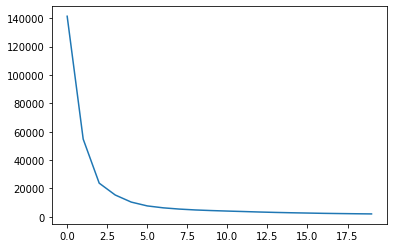

In [ ]:
# sum of squared clusters, calculating inertia
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters=num_clusters, max_iter=50)
    model_clus.fit(X_pca)
    ssd.append(model_clus.inertia_)
    
plt.plot(ssd)
plt.show()

In [ ]:
# Taking relevant clusters = 3
KMeans = KMeans(n_clusters=3, max_iter=50, random_state=0)
KMeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# calculating the centroids
centroids=KMeans.cluster_centers_
centroid_df=pd.DataFrame(centroids,columns=list(X_pca))
centroid_df

,0.782875,0.405017
,0.782875,0.405017
,-7.501799,0.501474
,0.782875,0.405017
,9.067549,0.308561
,-3.359462,0.453245
,-3.359462,0.453245
,-7.501799,0.501474
,-3.501452,0.540969
,-3.359462,0.453245
,0.782875,0.405017


In [ ]:
# we got three labels
KMeans.labels_

array([2, 2, 0, ..., 0, 1, 1], dtype=int32)

In [ ]:
#joining the labels to the copy of original data set
#df_analysis = df1.join(df_labels)
#df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(5788)
df_analysis=df1
df_analysis['labels_K_Means_Xpca'] = KMeans.labels_
df_analysis.head(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels_K_Means_Xpca
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
6,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
7,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
8,4,4,4,4,4,4,4,4,4,4,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
9,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0


In [ ]:
# Acc to clusters formed, we have 0-High, 1-Neutral, 2-Low
df_analysis['labels_K_Means_Xpca'].value_counts()

2    2363
0    2227
1    1230
Name: labels_K_Means_Xpca, dtype: int64

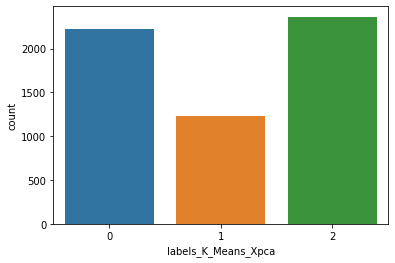

In [ ]:
sns.countplot(df_analysis.labels_K_Means_Xpca)
plt.show()

In [ ]:
from sklearn import metrics
KMeans_silhouette_score = metrics.silhouette_score(X_pca,KMeans.labels_, metric='euclidean') # calculating silhouette_score for k-means 
print("k_means_silhouette_score=",KMeans_silhouette_score)

k_means_silhouette_score= 0.5739942124633407


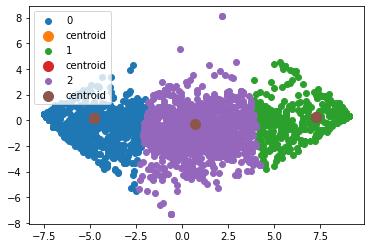

In [ ]:
def plotData(a,k,assignment,cent):

  #Getting unique labels
  
  df = pd.DataFrame(a)
  df['label'] = assignment
  
  centroids = pd.DataFrame(cent)

  u_labels = np.unique(assignment)
  
  #plotting the results:

  for i in u_labels:
    plt.scatter(df[df['label']==i][0] , df[df['label'] == i][1] , label = i)
    plt.scatter(centroids[0] , centroids[1], s=100,label = 'centroid')

  plt.legend()
  plt.show()  
plotData((pd.DataFrame(X_pca)),3,KMeans.labels_,centroids)

In [ ]:
#DF
# Applying K-Means

from sklearn.cluster import KMeans

cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 10)
    #clusters.fit(df_scaled)
    clusters.fit(df_scaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,162960.000000
1,2,76342.930760
2,3,45249.212346
3,4,36884.896075
4,5,31843.775050
5,6,29122.998167
6,7,27656.038548
7,8,26775.581984
8,9,26185.287919


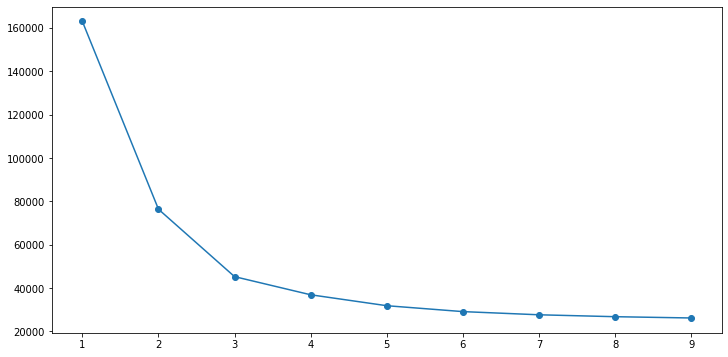

In [ ]:
# ELbow Plot or Scree Plot

plt.figure(figsize = (12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o')
plt.show()

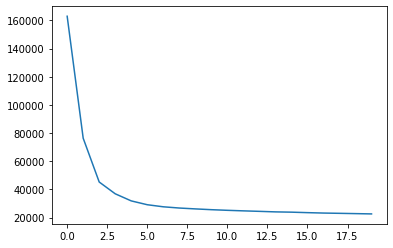

In [ ]:
# sum of squared clusters, calculating inertia
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters=num_clusters, max_iter=50)
    model_clus.fit(df_scaled)
    ssd.append(model_clus.inertia_)
    
plt.plot(ssd)
plt.show()

In [ ]:

# Taking relevant clusters = 3
KMeans = KMeans(n_clusters=3, max_iter=50, random_state=0)
KMeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:

# calculating the centroids
centroids=KMeans.cluster_centers_
centroid_df=pd.DataFrame(centroids,columns=list(df_scaled))
centroid_df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,0.869942,0.923108,0.888592,0.903968,0.943330,0.911358,0.934162,0.931105,0.894219,0.961428,0.887059,0.904960,0.909206,0.893714,0.892470,0.936341,0.803109,0.911515,0.904352,0.887557,0.879281,0.881959,0.933587,0.933666,0.880486,0.907723,0.894973,0.860808
1,-0.227017,-0.195465,-0.145937,-0.186769,-0.193285,-0.169104,-0.202737,-0.205126,-0.162166,-0.205216,-0.147813,-0.195459,-0.103345,-0.074972,-0.082021,-0.147778,-0.024223,-0.115674,-0.098883,-0.075039,-0.070103,-0.075183,-0.138039,-0.151338,-0.075248,-0.118897,-0.136553,-0.067183
2,-1.142231,-1.299449,-1.332102,-1.281442,-1.340352,-1.328847,-1.305520,-1.295375,-1.311088,-1.350243,-1.325712,-1.266520,-1.451479,-1.477955,-1.462133,-1.415231,-1.411149,-1.431945,-1.451254,-1.466650,-1.461127,-1.456214,-1.428973,-1.403526,-1.453415,-1.418860,-1.361743,-1.433214


In [ ]:

# we got three labels
KMeans.labels_

array([1, 1, 0, ..., 0, 2, 2], dtype=int32)

In [ ]:
 #creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(KMeans.labels_ , columns = ['labels'])
df_labels['labels'] = df_labels['labels'].astype('category')

df_labels.head()

,labels
0,1
1,1
2,0
3,1
4,2


In [ ]:
#joining the labels to the copy of original data set
#df_analysis = df1.join(df_labels)
#df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(5788)
df_analysis=df1
df_analysis['labels_K_Means'] = KMeans.labels_
df_analysis.head(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels_K_Means_Xpca,labels_K_Means
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0
6,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0
7,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0
8,4,4,4,4,4,4,4,4,4,4,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0
9,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0


In [ ]:

# Acc to clusters formed, we have 0-High, 1-Neutral, 2-Low
df_analysis['labels_K_Means'].value_counts()

1    2363
0    2229
2    1228
Name: labels_K_Means, dtype: int64

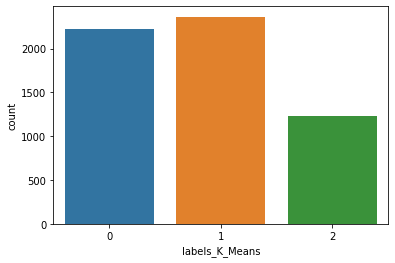

In [ ]:
sns.countplot(df_analysis.labels_K_Means)
plt.show()

Text(0.5, 0.92, '3D plot of KMeans Clustering')

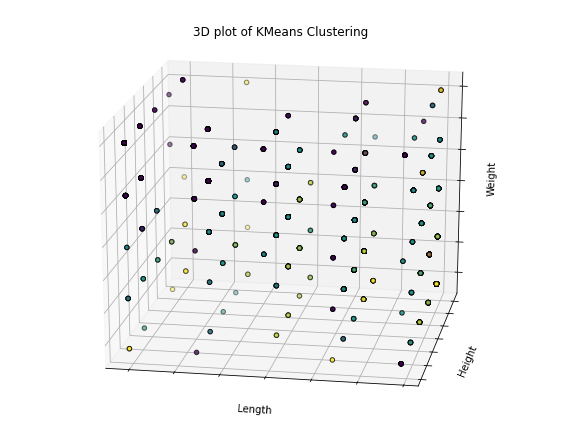

In [ ]:

# 3D vissualization
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
KMeans.fit(df_scaled)
labels = KMeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [ ]:
from sklearn import metrics
KMeans_silhouette_score = metrics.silhouette_score(df_scaled,KMeans.labels_, metric='euclidean') # calculating silhouette_score for k-means 
print("k_means_silhouette_score=",KMeans_silhouette_score)

k_means_silhouette_score= 0.45922068016023837


In [ ]:
df1.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels_K_Means_Xpca,labels_K_Means
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2


23692.26213837909
silhouetteScore :  0.574137054638492


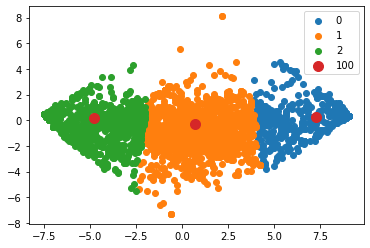

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
def assign(m,nm):

  assignment = []
  for nmobject in nm : 
    euDistance = []
    for mobject in m:
      euDistance.append(np.linalg.norm(nmobject - mobject))

    
    assignment.append(euDistance.index(min(euDistance)))

  return assignment
def SSE(m, nm, assignment):

  score = 0
  for i in range(len(assignment)):
    score += np.linalg.norm(nm[i] - m[assignment[i]]) * np.linalg.norm(nm[i] - m[assignment[i]])

  return score
def plotData(m,nm,k,assignment):

  #Getting unique labels
  
  nmdf = pd.DataFrame(nm)
  nmdf['label'] = assignment
  centroids = pd.DataFrame(m)

  u_labels = np.unique(assignment)
  
  # 0    1   2   3  label
  # 1.2 2.2 3.2 4.2 0
  # 3.2 4.6 5.8 2.1 1
  # #plotting the results:

  for i in u_labels:
    plt.scatter(nmdf[nmdf['label']==i][0] , nmdf[nmdf['label'] == i][1] , label = i)
  plt.scatter(centroids[0] , centroids[1], s=100,label = 100)

  plt.legend()
  plt.show()  
  
def silhouetteScore(m,nm,k,assignment):
  assignmentNew = list(assignment)
  for index in range(k):
    assignmentNew.append(index)

  nmm = np.concatenate((nm,m),axis=0)
  silhouettescore = metrics.silhouette_score(nmm,assignmentNew, metric='euclidean')


  return silhouettescore
def updateCentroids(m,nm,k,assignment):
  clusters = {}

  for i in range(len(m)):
    clusters[i] = [m[i]]

  for i in range(len(assignment)):
    clusters[assignment[i]].append(nm[i])

  for i in range(k):
    clusters[i] = np.array(clusters[i])
    m[i] = clusters[i].sum(axis = 0)
    m[i] /= len(clusters[i])

  return m

  

def kMeans(df,k,maxIterations):
  m = df.sample(n=k)
  nm = df.drop(m.index)
  m = list(m.values)
  nm = list(nm.values)

  

  itr = 1

  while itr <= maxIterations :

    assignment = assign(m,nm)
    currScore = SSE(m,nm,assignment)
    m = updateCentroids(m,nm,k,assignment)

    itr += 1

  


  assignment = assign(m,nm)
  currScore = SSE(m,nm,assignment)
  print(currScore)

  return m,nm,assignment,currScore




# manual Implementation
m,nm,assignment,currScore = kMeans((pd.DataFrame(X_pca)),3,100)

print('silhouetteScore : ',silhouetteScore(m,nm,3,assignment))


plotData(m,nm,3,assignment)


In [ ]:
# KMEDOID DF INBUILT
!pip install scikit-learn-extra
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(df1)
# x_scaled = scaler.transform(df1)
kMedoids = KMedoids(n_clusters = 3, random_state =42 )
kMedoids.fit(df_scaled)
y_kmed = kMedoids.fit_predict(df_scaled)
print(y_kmed)
#df_analysis['labels_K_Medoid'] = y_kmed
silhouette_avg = silhouette_score(df_scaled, y_kmed)
print(silhouette_avg)

     |████████████████████████████████| 1.7 MB 16.2 MB/s 
     |████████████████████████████████| 23.2 MB 65.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


[0 1 0 ... 0 0 0]
-0.34633871436204144


In [ ]:
#df_analysis['labels_K_Medoid'].value_counts()

[[ 9.06754915  0.30856096]
 [-3.35946227  0.45324548]
 [ 0.78287487  0.4050173 ]]
[2 2 1 ... 1 0 0]
Counter({1: 2446, 2: 2297, 0: 1077})
9395.500476366498
0.5636785585307372


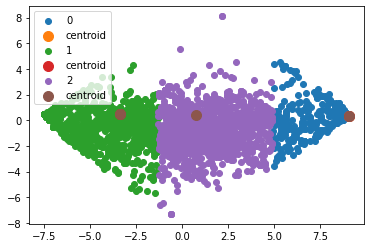

In [ ]:
#KMEDOID XPCA INBUILT
#!pip install scikit-learn-extra
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from collections import Counter
#scaler = StandardScaler().fit(df1)
# x_scaled = scaler.transform(df1)
kMedoids = KMedoids(n_clusters = 3, random_state =42 )
kMedoids.fit(X_pca)
y_kmed = kMedoids.fit_predict(X_pca)
kmedoids_centers = kMedoids.cluster_centers_
print(kmedoids_centers)
print(y_kmed)
print(Counter(y_kmed))
print(kMedoids.inertia_)
df_analysis['labels_K_Medoid_Xpca'] = y_kmed
silhouette_avg = silhouette_score(X_pca, y_kmed)
print(silhouette_avg)
def plotData(a,k,assignment,cent):

  #Getting unique labels
  
  df = pd.DataFrame(a)
  df['label'] = assignment
  
  centroids = pd.DataFrame(cent)

  u_labels = np.unique(assignment)
  
  #plotting the results:

  for i in u_labels:
    plt.scatter(df[df['label']==i][0] , df[df['label'] == i][1] , label = i)
    plt.scatter(centroids[0] , centroids[1], s=100,label = 'centroid')

  plt.legend()
  plt.show()  
plotData((pd.DataFrame(X_pca)).copy(),3,y_kmed,kmedoids_centers)

In [ ]:
df_analysis['labels_K_Medoid_Xpca'].value_counts()

1    2446
2    2297
0    1077
Name: labels_K_Medoid_Xpca, dtype: int64

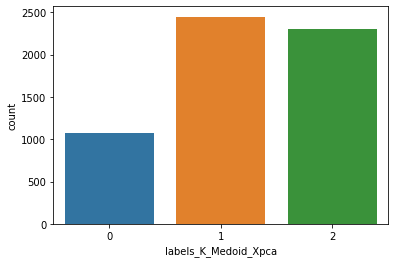

In [ ]:
sns.countplot(df_analysis.labels_K_Medoid_Xpca)
plt.show()

In [ ]:
df_analysis.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels_K_Means_Xpca,labels_K_Means,labels_K_Medoid_Xpca
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,1
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,0


In [ ]:
# del df1['labels_K_Means']
# del df1['labels_K_Medoid']

In [ ]:
df1.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels_K_Means_Xpca,labels_K_Means,labels_K_Medoid_Xpca
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,1
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,0


In [ ]:
X_pca

array([[ 0.78287487,  0.4050173 ],
       [ 0.78287487,  0.4050173 ],
       [-7.50179941,  0.50147365],
       ...,
       [-7.50179941,  0.50147365],
       [ 9.06754915,  0.30856096],
       [ 9.06754915,  0.30856096]])

In [ ]:
# KMEDOID DF
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import math
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

# number of clusters = k


def assign(m,nm):

  assigning = []
  for nmobject in nm : 
    euDistance = []
    for mobject in m:
      euDistance.append(np.linalg.norm(nmobject - mobject)*np.linalg.norm(nmobject - mobject))
    
    assigning.append(euDistance.index(min(euDistance)))

  return assigning


def SSE(m, nm, assigning):

  score = 0
  for i in range(len(assigning)):
    score += np.linalg.norm(nm[i] - m[assigning[i]])

  return score

def KMedoids(df,k):

  m = df.sample(n=k)
  nm = df.drop(m.index)
  m = list(m.values)
  nm = list(nm.values)

  assigning = assign(m,nm)
  currScore = SSE(m,nm,assigning)

  mbestIndex = -1
  nmbestIndex = -1
  bestScore = currScore


  
  while(True):

    assigning = assign(m,nm)
    currScore = SSE(m,nm,assigning)

    for i in range(len(m)):
      for j in range(len(nm)):

        # list(x) returns copy of x
        mCopy = list(m)
        nmCopy = list(nm)
        
        mCopy[i],nmCopy[j] = nmCopy[j], mCopy[i]
        assignmentNew = assign(mCopy,nmCopy)
        currScoreNew = SSE(mCopy,nmCopy,assignmentNew)

        if(bestScore > currScoreNew):
          bestScore = currScoreNew
          mbestIndex = i
          nmbestIndex = j

    
    if(bestScore == currScore):
      break

    m[mbestIndex],nm[nmbestIndex] = nm[nmbestIndex], m[mbestIndex]

    


  assigning = assign(m,nm)
  currScore = SSE(m,nm,assigning)


  print('SSE : ',currScore)
  print(assigning)
  #df_analysis['labels_K_Medoid']=assigning
  score = metrics.silhouette_score(nm,assigning, metric='euclidean')
  print("silhouette coefficient=",score)
  

k = 3
KMedoids(df_scaled.sample(n=100),k)


SSE :  201.89204545860227
[1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1]
silhouette coefficient= 0.48858354988235625


In [ ]:
#KMEDOID XPCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import math
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

# number of clusters = k


def assign(m,nm):

  assigning = []
  for nmobject in nm : 
    euDistance = []
    for mobject in m:
      euDistance.append(np.linalg.norm(nmobject - mobject)*np.linalg.norm(nmobject - mobject))
    
    assigning.append(euDistance.index(min(euDistance)))

  return assigning


def SSE(m, nm, assigning):

  score = 0
  for i in range(len(assigning)):
    score += np.linalg.norm(nm[i] - m[assigning[i]])

  return score

def KMedoids(df,k):

  m = df.sample(n=k)
  nm = df.drop(m.index)
  m = list(m.values)
  nm = list(nm.values)

  assigning = assign(m,nm)
  currScore = SSE(m,nm,assigning)

  mbestIndex = -1
  nmbestIndex = -1
  bestScore = currScore


  
  while(True):

    assigning = assign(m,nm)
    currScore = SSE(m,nm,assigning)

    for i in range(len(m)):
      for j in range(len(nm)):

        # list(x) returns copy of x
        mCopy = list(m)
        nmCopy = list(nm)
        
        mCopy[i],nmCopy[j] = nmCopy[j], mCopy[i]
        assignmentNew = assign(mCopy,nmCopy)
        currScoreNew = SSE(mCopy,nmCopy,assignmentNew)

        if(bestScore > currScoreNew):
          bestScore = currScoreNew
          mbestIndex = i
          nmbestIndex = j

    
    if(bestScore == currScore):
      break

    m[mbestIndex],nm[nmbestIndex] = nm[nmbestIndex], m[mbestIndex]

    


  assigning = assign(m,nm)
  currScore = SSE(m,nm,assigning)


  print('SSE : ',currScore)
  print(assigning)
  #df_analysis['labels_K_Medoid']=assigning
  score = metrics.silhouette_score(nm,assigning, metric='euclidean')
  print("silhouette coefficient=",score)
  

k = 3
KMedoids((pd.DataFrame(X_pca)).sample(n=100),k)


SSE :  176.20484197833235
[0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0]
silhouette coefficient= 0.5665561837211234


In [ ]:
#df_analysis['labels_K_Medoid'].value_counts()

In [ ]:
df_analysis.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels_K_Means_Xpca,labels_K_Means,labels_K_Medoid_Xpca
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,1
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,0


     |████████████████████████████████| 15.7 MB 60 kB/s 
     |████████████████████████████████| 10.1 MB 37.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Cluster Centers : 
  [[ 7.90097114  0.25554943]
 [-4.81164344  0.18337275]
 [ 0.78686506 -0.07238547]] 

Cluster labels : 
  [2 2 1 ... 1 0 0] 

Silhouette Coefficient:  0.5734417763169023 

SSE :  1e-05 

Elements in each Cluster : 
 Counter({2: 2394, 1: 2241, 0: 1185}) 



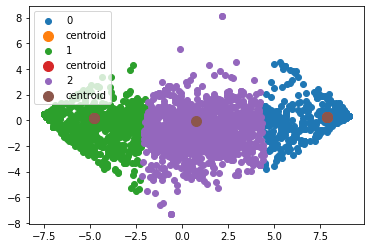

In [ ]:
#FCM IN BUILT Xpca
!pip install fuzzy-c-means
import numpy as np
import pandas as pd
from fcmeans import FCM
from sklearn.metrics import silhouette_score


fcm = FCM(n_clusters=3)
fcm.fit(X_pca)

fcm_centers = fcm.centers
fcm_labels = fcm.predict(X_pca)
fcm_sse = fcm.error

print("Cluster Centers : \n ", fcm_centers , "\n")
print("Cluster labels : \n ", fcm_labels , "\n")
print("Silhouette Coefficient: ", silhouette_score(X_pca, fcm_labels) ,"\n")
print("SSE : " , fcm_sse , "\n")

from collections import Counter
print("Elements in each Cluster : \n" , Counter(fcm_labels) ,"\n")
def plotData(a,k,assignment,cent):

  #Getting unique labels
  
  df = pd.DataFrame(a)
  df['label'] = assignment
  
  centroids = pd.DataFrame(cent)

  u_labels = np.unique(assignment)
  
  #plotting the results:

  for i in u_labels:
    plt.scatter(df[df['label']==i][0] , df[df['label'] == i][1] , label = i)
    plt.scatter(centroids[0] , centroids[1], s=100,label = 'centroid')

  plt.legend()
  plt.show()  
plotData((pd.DataFrame(X_pca)).copy(),3,fcm_labels,fcm_centers)

In [ ]:
#FCM df

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
import math
from sklearn import metrics
from random import randrange
from sklearn.cluster import KMeans






def intializeMembership(n,c):
  
  myu = []

  for i in range(n):
    x = []
    for j in range(c):
      x.append(random.uniform(0,1))

    myu.append(x)

  for i in range(n):
    s = 0
    for x in myu[i]:
      s += x
    myu[i] = [x/s for x in myu[i]]

  return myu


def SSE(c,a,assignment):

  sse = 0
  for i in range(len(a)):
    sse += np.linalg.norm(a[i] - c[assignment[i]]) * np.linalg.norm(a[i] - c[assignment[i]])

  return sse




def FCM(df,k,m,maxIterations):

  myu = intializeMembership(len(df),k)

  a = list(df.values)
  n = len(a)
  numFeatures = len(a[0])

  # finding centers ( number of clusters * number of features)
  c = [[0 for j in range(numFeatures)] for i in range(k)]

  

  



  itr = 1

  while itr <= maxIterations:

    
    
    for j in range(k):
      numerator = []
      denominator = 0
      for i in range(n):
        numerator.append([x*pow(myu[i][j],m) for x in a[i]])
        denominator += pow(myu[i][j],m)

      numerator = np.array(numerator)

      numerator = numerator.sum(axis = 0) 

      c[j] = [x/denominator for x in numerator]
    
    for i in range(n):
      for j in range(k):
        sum = 0
        for l in range(k):
          sum += pow(np.linalg.norm(a[i] - c[j])/np.linalg.norm(a[i] - c[l]),2/(m-1))
        
        myu[i][j] = 1/sum

    itr += 1

  
  assignment = []

 
  for i in range(n):
    assignment.append(np.argmax(myu[i]))

  return c,myu,assignment

def plotData(a,c,k,assignment):

  #Getting unique labels
  
  df = pd.DataFrame(a)
  df['label'] = assignment
  centroids = pd.DataFrame(c)

  u_labels = np.unique(assignment)
  
  #plotting the results:

  for i in u_labels:
    plt.scatter(df[df['label']==i][0] , df[df['label'] == i][1] , label = i)
  plt.scatter(centroids[0] , centroids[1], s=100,label = 'centroid')

  plt.legend()
  plt.show()  
  
# number of clusters
k = 3

# degree of fuzzification : usually 2
m = 2

a= list(df_scaled.values)


c,myu,assignment = FCM(df_scaled,k,m,50)

print(SSE(c,a,assignment))
# print(myu)
print(assignment)
# df_labels_FCM = pd.DataFrame(assignment , columns = ['labels_FCM'])
# df_labels_FCM['labels_FCM'] = df_labels_FCM['labels_FCM'].astype('category')
# df_labeled = df1.join(df_labels_FCM)

# df_analysis = (df_labeled.groupby(['labels_FCM'] , axis=0)).head(5788)
# print(df_analysis.head(10))
# df_labeled['labels_FCM'].value_counts()
df_analysis['labels_FCM'] = assignment

#print(df1)
#df2['label'] = assignment


#plotData(a,c,k,assignment)

    
print('Silhouette Score : ',metrics.silhouette_score(a,assignment, metric='euclidean'))


# sselist = []
# klist = []
# for i in range(1,11):
#   c,myu,assignment = FCM(df_scaled,i,m,100)
#   sselist.append(SSE(c,a,assignment))
#   klist.append(i) 

# plt.plot(klist,sselist,label=str('Elbow'))
# plt.xlabel("K")
# # naming the y axis
# plt.ylabel("SSE")
# plt.legend()
# plt.show()





    

    





  


45692.739594007886
[2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1,

In [ ]:
df_analysis['labels_FCM'].value_counts()

2    2367
0    2251
1    1202
Name: labels_FCM, dtype: int64

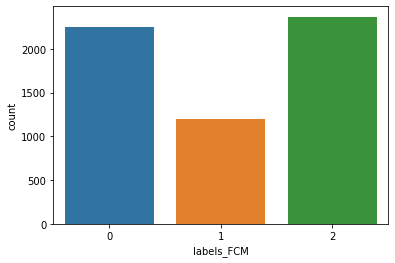

In [ ]:
sns.countplot(df_analysis.labels_FCM)
plt.show()

24177.87127598875
[1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 

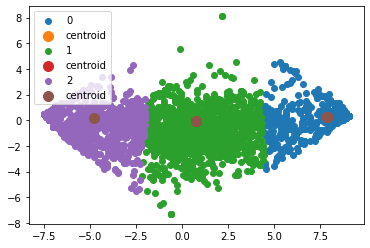

Silhouette Score :  0.5734417763169023


In [ ]:
#FCM XPCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
import math
from sklearn import metrics
from random import randrange
from sklearn.cluster import KMeans






def intializeMembership(n,c):
  
  myu = []

  for i in range(n):
    x = []
    for j in range(c):
      x.append(random.uniform(0,1))

    myu.append(x)

  for i in range(n):
    s = 0
    for x in myu[i]:
      s += x
    myu[i] = [x/s for x in myu[i]]

  return myu


def SSE(c,a,assignment):

  sse = 0
  for i in range(len(a)):
    sse += np.linalg.norm(a[i] - c[assignment[i]]) * np.linalg.norm(a[i] - c[assignment[i]])

  return sse




def FCM(df,k,m,maxIterations):

  myu = intializeMembership(len(df),k)

  a = list(df.values)
  n = len(a)
  numFeatures = len(a[0])

  # finding centers ( number of clusters * number of features)
  c = [[0 for j in range(numFeatures)] for i in range(k)]

  

  



  itr = 1

  while itr <= maxIterations:

    
    
    for j in range(k):
      numerator = []
      denominator = 0
      for i in range(n):
        numerator.append([x*pow(myu[i][j],m) for x in a[i]])
        denominator += pow(myu[i][j],m)

      numerator = np.array(numerator)

      numerator = numerator.sum(axis = 0) 

      c[j] = [x/denominator for x in numerator]
    
    for i in range(n):
      for j in range(k):
        sum = 0
        for l in range(k):
          sum += pow(np.linalg.norm(a[i] - c[j])/np.linalg.norm(a[i] - c[l]),2/(m-1))
        
        myu[i][j] = 1/sum

    itr += 1

  
  assignment = []

 
  for i in range(n):
    assignment.append(np.argmax(myu[i]))

  return c,myu,assignment

def plotData(a,c,k,assignment):

  #Getting unique labels
  
  df = pd.DataFrame(a)
  df['label'] = assignment
  centroids = pd.DataFrame(c)

  u_labels = np.unique(assignment)
  
  #plotting the results:

  for i in u_labels:
    plt.scatter(df[df['label']==i][0] , df[df['label'] == i][1] , label = i)
    plt.scatter(centroids[0] , centroids[1], s=100,label = 'centroid')

  plt.legend()
  plt.show()  
  
# number of clusters
k = 3

# degree of fuzzification : usually 2
m = 2

a= list((pd.DataFrame(X_pca)).values)


c,myu,assignment = FCM((pd.DataFrame(X_pca)),k,m,50)

print(SSE(c,a,assignment))
# print(myu)
print(assignment)
# df_labels_FCM = pd.DataFrame(assignment , columns = ['labels_FCM'])
# df_labels_FCM['labels_FCM'] = df_labels_FCM['labels_FCM'].astype('category')
# df_labeled = df1.join(df_labels_FCM)

# df_analysis = (df_labeled.groupby(['labels_FCM'] , axis=0)).head(5788)
# print(df_analysis.head(10))
# df_labeled['labels_FCM'].value_counts()
df_analysis['labels_FCM_Xpca'] = assignment

#print(df1)
#df2['label'] = assignment


plotData(a,c,k,assignment)

    
print('Silhouette Score : ',metrics.silhouette_score(a,assignment, metric='euclidean'))


# sselist = []
# klist = []
# for i in range(1,11):
#   c,myu,assignment = FCM(df_scaled,i,m,100)
#   sselist.append(SSE(c,a,assignment))
#   klist.append(i) 

# plt.plot(klist,sselist,label=str('Elbow'))
# plt.xlabel("K")
# # naming the y axis
# plt.ylabel("SSE")
# plt.legend()
# plt.show()





    

    





  


In [ ]:
df_analysis['labels_FCM_Xpca'].value_counts()

1    2394
2    2241
0    1185
Name: labels_FCM_Xpca, dtype: int64

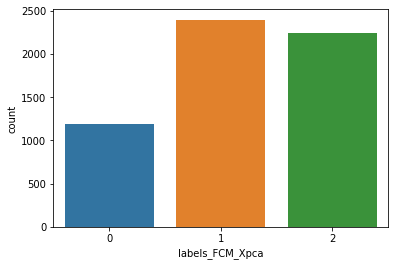

In [ ]:
sns.countplot(df_analysis.labels_FCM_Xpca)
plt.show()

In [ ]:
df_analysis.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels_K_Means_Xpca,labels_K_Means,labels_K_Medoid_Xpca,labels_FCM,labels_FCM_Xpca
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2,2,1
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2,2,1
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,1,0,2
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2,2,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,0,1,0


[1 1 0 ... 0 2 2]
Counter({0: 2380, 1: 1945, 2: 1495})
[[[-3.35514814 -0.09015468]]

 [[ 0.26942388 -0.14813461]]

 [[ 4.41333633 -0.17400609]]]
37259.01937118156
0.5382448055350094
          0         1
0  0.269424 -0.148135
          0         1
0 -3.355148 -0.090155
1  0.269424 -0.148135
2  4.413336 -0.174006


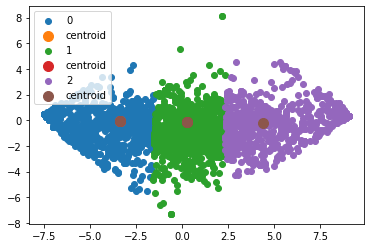

In [ ]:
# INBUIT SOM XPCA
!pip install sklearn-som
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import math
from sklearn import metrics
from sklearn_som.som import SOM
model = SOM(m=3, n=1, dim=2)
model.fit((pd.DataFrame(X_pca)).values)
clusters = model.predict((pd.DataFrame(X_pca)).values)
print(clusters)
print(Counter(clusters))
som_sse=model.inertia_
som_centers = model.cluster_centers_
print(som_centers)
print(som_sse)
print(silhouette_score(X_pca,clusters))
df_analysis['labels_SOM_Xpca'] = clusters
def plotData(a,k,assignment,cent):

 #Getting unique labels
  
  df = pd.DataFrame(a)
  df['label'] = assignment
  
  centroids = pd.DataFrame(cent[0])
  f=pd.DataFrame(cent[1])
  print(f)
  g=pd.DataFrame(cent[2])
  centroids=pd.concat([centroids, f], ignore_index = True)
  centroids=pd.concat([centroids, g], ignore_index = True)
  print(centroids)
  u_labels = np.unique(assignment)
  
  #plotting the results:

  for i in u_labels:
    plt.scatter(df[df['label']==i][0] , df[df['label'] == i][1] , label = i)
    plt.scatter(centroids[0] , centroids[1], s=100,label = 'centroid')

  plt.legend()
  plt.show()  
plotData((pd.DataFrame(X_pca)).copy(),3,clusters,som_centers)

In [ ]:
df_analysis['labels_SOM_Xpca'].value_counts()

0    2380
1    1945
2    1495
Name: labels_SOM_Xpca, dtype: int64

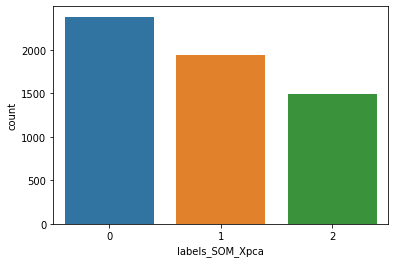

In [ ]:
sns.countplot(df_analysis.labels_SOM_Xpca)
plt.show()

62549.56350201967
[1 1 0 ... 0 2 2]
0.4273877689398408


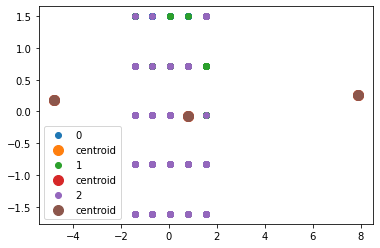

In [ ]:
#INBULIT SOM DF

#!pip install sklearn-som
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import math
from sklearn import metrics
from sklearn_som.som import SOM
model = SOM(m=3, n=1, dim=28)
model.fit(df_scaled.values)
clusters = model.predict(df_scaled.values)
som_sse=model.inertia_
print(som_sse)
print(clusters)
print(silhouette_score(df_scaled,clusters))
df_analysis['labels_SOM'] = clusters
def plotData(a,k,assignment):

  #Getting unique labels
  
  df = pd.DataFrame(a)
  df['label'] = assignment
  
  centroids = pd.DataFrame(c)

  u_labels = np.unique(assignment)
  
  #plotting the results:

  for i in u_labels:
    plt.scatter(df[df['label']==i]["Q1"] , df[df['label'] == i]["Q2"] , label = i)
    plt.scatter(centroids[0] , centroids[1], s=100,label = 'centroid')

  plt.legend()
  plt.show()  
plotData(df_scaled.copy(),3,clusters)

In [ ]:
df_analysis['labels_SOM'].value_counts()

0    2446
1    1879
2    1495
Name: labels_SOM, dtype: int64

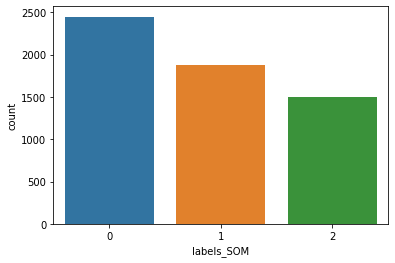

In [ ]:
sns.countplot(df_analysis.labels_SOM)
plt.show()

0.45721602501288267


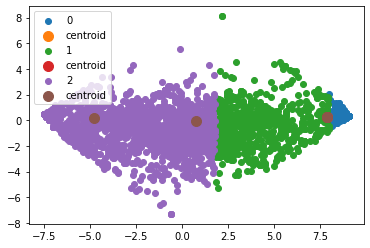

In [ ]:
#SOM XPCA
# RESTART RUNTIME

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
import math
from sklearn import metrics
from sklearn.cluster import KMeans
!pip install sklearn-som
from sklearn_som.som import SOM











X_pcaCopy = X_pca.copy()






# Neighborhood : Guassian (sigma/neighborhood distance = 1)
# Output Neurons : 1 Dimensional
# Winner Criteria : Minimum Euclidean Distance


def plotData(a,k,assignment):

  #Getting unique labels
  
  df = pd.DataFrame(a)
  df['label'] = assignment
  centroids = pd.DataFrame(c)

  u_labels = np.unique(assignment)
  
  #plotting the results:

  for i in u_labels:
    plt.scatter(df[df['label']==i][0] , df[df['label'] == i][1] , label = i)
    plt.scatter(centroids[0] , centroids[1], s=100,label = 'centroid')

  plt.legend()
  plt.show()  

def predict(df, w):

  predicted_clusters = []
  for i in range(len(df)):
    D = []
    for j in range(len(w)):
      D.append(np.linalg.norm(df.iloc[i] - w[j]))

    I = D.index(min(D))
    
    predicted_clusters.append(I)

  return predicted_clusters

def SOMAlgo(df, k, alpha, sigma, maxIterations):

  # DataFrame to Array
  a = list(df.values)
  # number of features
  numFeatures =  len(df.columns)


  w = [[random.uniform(-0.3,0.3) for j in range(numFeatures)] for i in range(k)]

  # print(w)

  itr = 1

  while True :

    if(itr > maxIterations):
      break

    for x in a:
      D = []
      d = []
      h = []
      I = None

      # Distance between the input pattern and the output neuron
      for i in range(k):
        D.append(np.linalg.norm(x - w[i]))

      # 1. COMPETITION or Anouncing the Winner
      I = D.index(min(D))

      # Finding Lateral Distance between the Winner Output Neuron and Other output Neurons
      for i in range(k):
        d.append(abs(I - i))

      # 2. COOPERATION - Finding the neighbourhood value 
      for i in range(k):
        h.append(pow(math.e,-(d[i]*d[i])/(2*sigma*sigma)))

      # 3. UPDATING WEIGHTS
      for i in range(k):
        for j in range(numFeatures):
          w[i][j] = w[i][j] + alpha * h[i] * (x[j] - w[i][j])

    itr += 1

  # print(w)

  return w



k = 3

for i in range(1,20):
  w = SOMAlgo((pd.DataFrame(X_pca)),k,1,1,i)
  clusters = predict((pd.DataFrame(X_pca)), w)
print(metrics.silhouette_score(X_pca,clusters, metric='euclidean'))
plotData((pd.DataFrame(X_pcaCopy)),k,clusters)


    


    


In [ ]:
df_analysis.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels_K_Means_Xpca,labels_K_Means,labels_K_Medoid_Xpca,labels_FCM,labels_FCM_Xpca,labels_SOM_Xpca,labels_SOM
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2,2,1,1,1
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2,2,1,1,1
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,1,0,2,0,0
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2,2,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,0,1,0,2,2
